<center><h1> Analiza internacionalnih utakmica u posljednih 30ak godina </h1></center>
<center><h3> </h3></center> 
<center><h3> </h3></center> 
<center><h3> Tonino Kaštelan, Matej Kožica, Nikola Tafra</h3></center>
<center><h3> </h3></center> 
<center><h4> Akademska godina 2022./2023.</h4></center>

## Opis projekta i podaci

Za potrebe ovog projekta iskorišteni su podaci dostupni na sljedećem linku: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022.
U sklopu navedenog skupa podataka moguće je pronaći sve informacije o internacionalnim utakmicama odigranih od 08.08.1993. godine. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `date`           | Datum kada je utakmica odigrana |
| `home_team`            | Domaća momčad. |
| `away_team`      | Gostujuća momčad. |
| `home_team_continent`      | Kontinent s kojeg dolazi domaća momčad. |
| `away_team_continent`            | Kontinent s kojeg dolazi gostujuća momčad |
| `home_team_fifa_rank`     | FIFA ranking domaće momčadi. |
| `away_team_fifa_rank`            | FIFA ranking gostujuće momčadi. |
| `home_team_total_fifa_points`       | Zbroj FIFA bodova svih igrača domaće momčadi.  |
| `away_team_total_fifa_points` | Zbroj FIFA bodova svih igrača gostujuće momčadi. |
| `home_team_score` | Broj golova domaće momčadi. |
| `away_team_score` | Broj golova gostujuće momčadi |
| `tournament` | Natjecanje u sklopu kojeg je utakmica odigrana. |
| `city` | Grad u kojem je utakmica odigrana. |
| `country` | Država u kojoj je utakmica odigrana. |
| `neutral_location` | NEMAM POJMA ŠTA JE OVO. |
| `shoot_out` | Je li utakmica završila izvođenjem jedanaesteraca? |
| `home_team_result` | Ishod utakmice za domaću momčad. |
| `home_team_goalkeeper_score` | FIFA ranking golmana domaće momčadi. |
| `away_team_goalkeeper_score` | FIFA ranking golmana gostujuće momčadi. |
| `home_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača domaće momčadi. |
| `home_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača domaće momčadi. |
| `home_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača domaće momčadi. |
| `away_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača gostujuće momčadi. |
| `away_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača gostujuće momčadi. |
| `away_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača gostujuće momčadi. |

### Priprema Podataka

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib


matches_df = pd.read_csv("./international_matches.csv")

**Gradovi u kojima je odigrano najviše internacionalnih utakmica**

<AxesSubplot: xlabel='count', ylabel='city'>

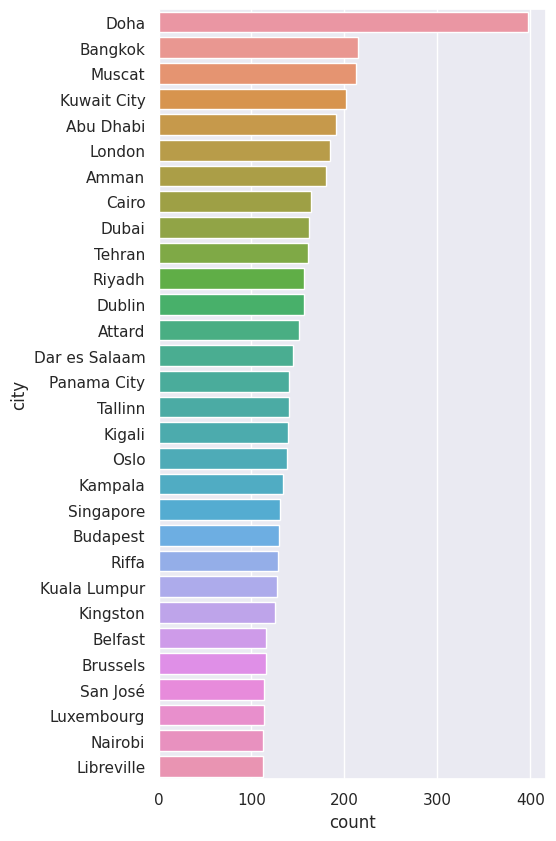

In [206]:
cities_df = matches_df.groupby(['city']).size().reset_index(name='count').sort_values("count", ascending=False).head(30)
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(cities_df, x='count', y='city', orient='h')

**Države koje u prosjeku imaju najbolju obranu po FIFA ocjenama**

<AxesSubplot: xlabel='mean_defense_score', ylabel='country'>

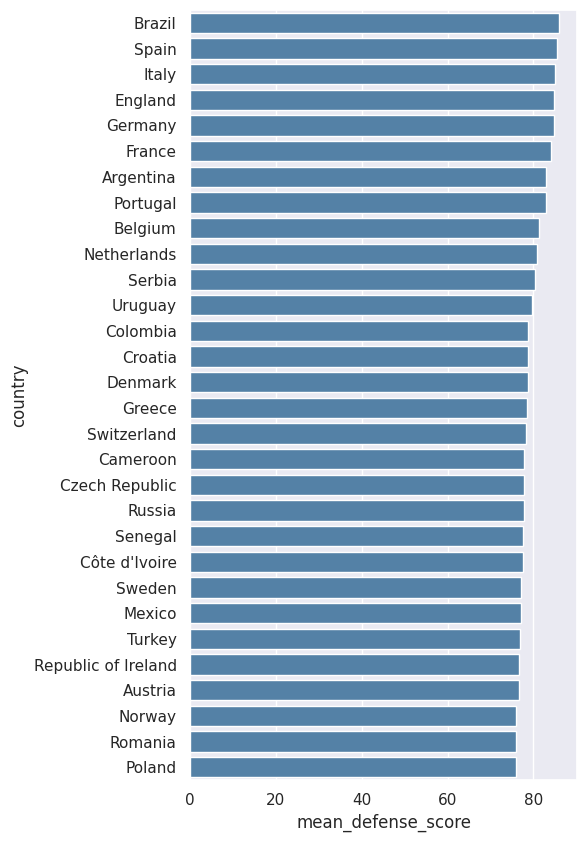

In [201]:
home_team_defense_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
away_team_defense_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
countries_defense_mean_score = pd.concat([home_team_defense_mean_score, away_team_defense_mean_score])
countries_defense_mean_score = countries_defense_mean_score.groupby(countries_defense_mean_score['country'], as_index=False).aggregate('mean').sort_values(by="mean_defense_score", ascending=False).head(30)
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(data=countries_defense_mean_score, y=countries_defense_mean_score['country'], x=countries_defense_mean_score['mean_defense_score'], orient='h', color="steelblue")

**Države koje su u jednoj utakmici zabile najviše golova**

<AxesSubplot: xlabel='score', ylabel='match'>

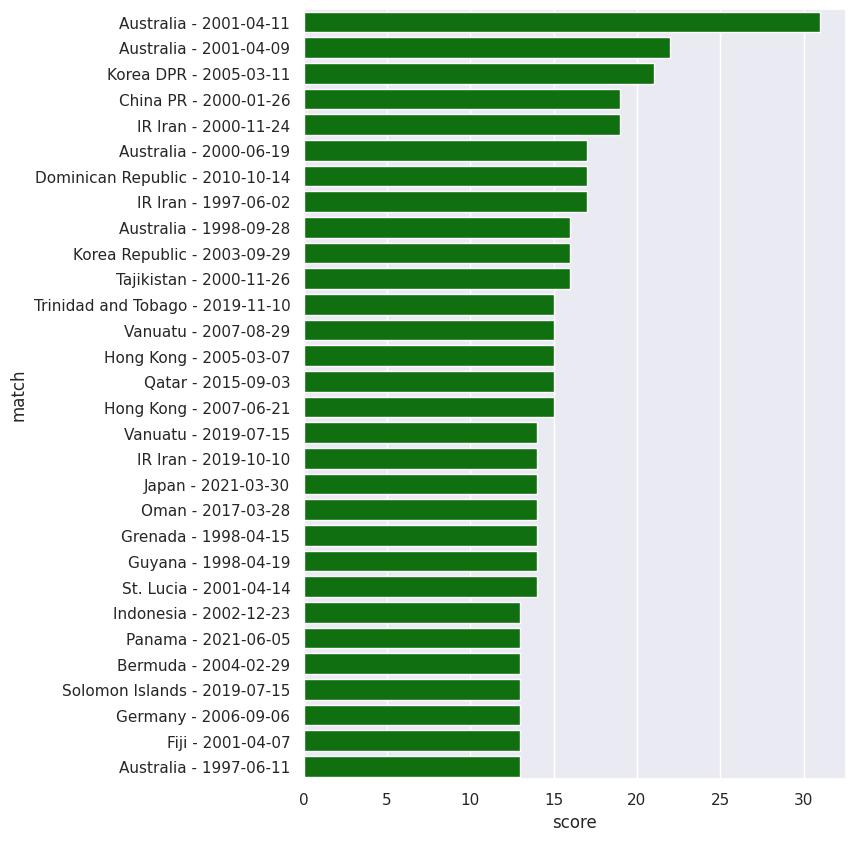

In [198]:
matches_goals_ho = matches_df[["home_team", "date", "home_team_score"]].rename(columns={"home_team_score": "score", "home_team": "team"})
matches_goals_aw = matches_df[["away_team", "date", "away_team_score"]].rename(columns={"away_team_score": "score", "away_team": "team"})
countries_most_goals = pd.DataFrame(pd.concat([matches_goals_ho, matches_goals_aw])).groupby(["team", "date"], as_index=False).aggregate("max").sort_values(by="score", ascending=False).head(30)
countries_most_goals["match"] = countries_most_goals["team"] + " - "  + countries_most_goals["date"]
sns.set(rc={'figure.figsize':(7,10)})
sns.barplot(data=countries_most_goals, y=countries_most_goals['match'], x=countries_most_goals['score'], orient='h', color="green")


**Broj utakmica velikih turnira po godinama**

/tmp/ipykernel_3198/3125245776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_matches_df['date'] = pd.to_datetime(filt_matches_df['date'], format='%Y-%m-%d')
/tmp/ipykernel_3198/3125245776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_matches_df['year'] = filt_matches_df['date'].dt.strftime('%Y')
/tmp/ipykernel_3198/3125245776.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = matches_years_tournaments.pivot("tournament", "y

<AxesSubplot: xlabel='year', ylabel='tournament'>

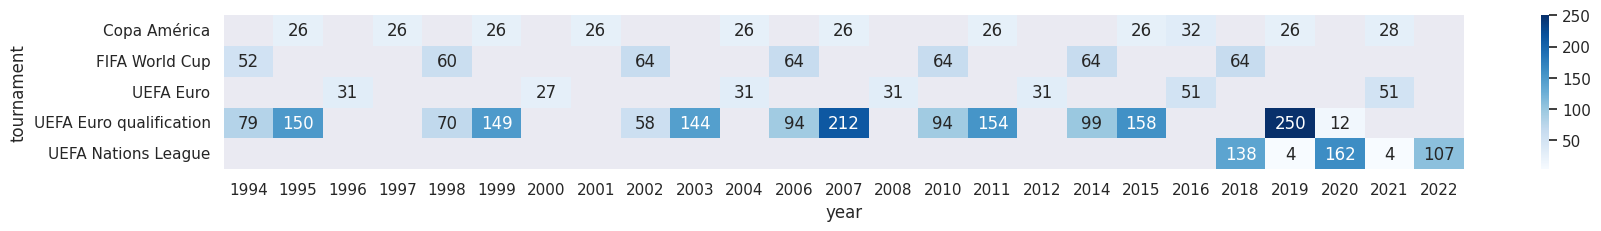

In [35]:
filt_matches_df = matches_df[matches_df["tournament"].isin(["Copa América", "FIFA World Cup", "UEFA Nations League", "UEFA Euro", "UEFA Euro qualification"])]
filt_matches_df['date'] = pd.to_datetime(filt_matches_df['date'], format='%Y-%m-%d')
filt_matches_df['year'] = filt_matches_df['date'].dt.strftime('%Y')
matches_years_tournaments = filt_matches_df[["year", "tournament"]].groupby(["year", "tournament"], as_index=False).size()
piv = matches_years_tournaments.pivot("tournament", "year", "size")
sns.set(rc={'figure.figsize':(20,2)})
sns.heatmap(piv, annot=True, fmt="g", cmap="Blues")

**Broj utakmica u godini**

/tmp/ipykernel_4426/527311551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches_df['date'] = pd.to_datetime(new_matches_df.date)


<AxesSubplot: >

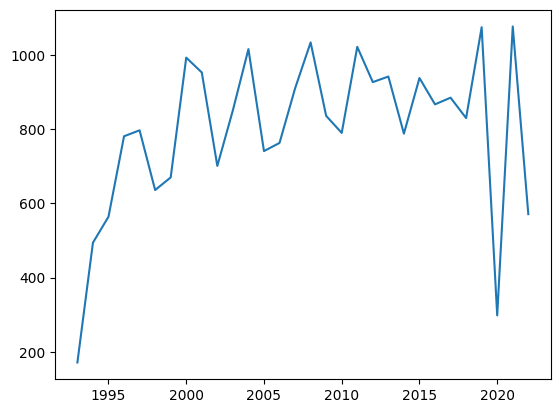

In [28]:
new_matches_df = matches_df[["date"]]
new_matches_df['date'] = pd.to_datetime(new_matches_df.date)
new_matches_df.date.dt.year.value_counts().sort_index().plot()


**Distribucija tipova pobjeda**

<AxesSubplot: xlabel='year'>

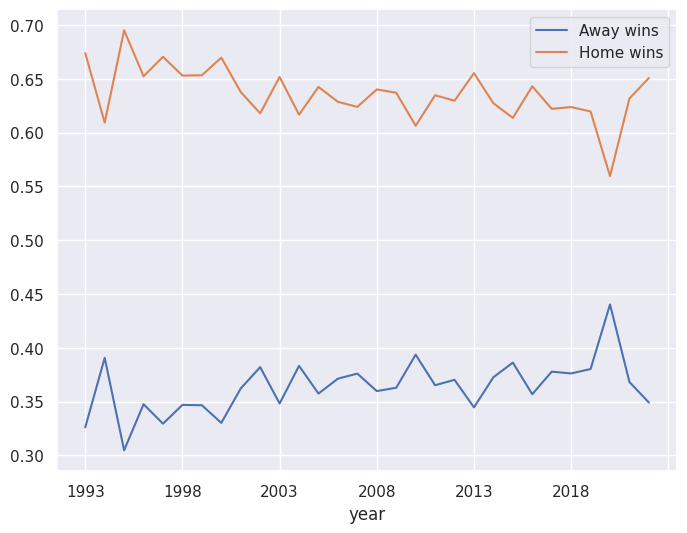

In [234]:

matches_df_outcomes = matches_df.copy()
matches_df_outcomes['date'] = pd.to_datetime(matches_df_outcomes['date'], format='%Y-%m-%d')
matches_df_outcomes['year'] = matches_df_outcomes['date'].dt.strftime('%Y')

matches_home_wins_df = matches_df_outcomes[matches_df_outcomes["home_team_score"] > matches_df_outcomes["away_team_score"]]
matches_home_wins_df = matches_home_wins_df.groupby(by="year").size().reset_index(name="count_home")

matches_away_wins_df = matches_df_outcomes[matches_df_outcomes["home_team_score"] < matches_df_outcomes["away_team_score"]]
matches_away_wins_df = matches_away_wins_df.groupby(by="year").size().reset_index(name="count_away")

matches_outcomes = pd.DataFrame(pd.concat([matches_away_wins_df, matches_home_wins_df]).groupby(by="year").aggregate("sum"))
matches_outcomes["total"] = matches_outcomes["count_away"] + matches_outcomes["count_home"]
matches_outcomes["count_away"] = matches_outcomes["count_away"]/matches_outcomes["total"]
matches_outcomes["count_home"] = matches_outcomes["count_home"]/matches_outcomes["total"]
matches_outcomes = matches_outcomes.drop("total", axis=1).rename(columns={"count_away": "Away wins", "count_home": "Home wins"})
sns.set(rc={'figure.figsize':(8,6)})
matches_outcomes.plot(kind="line")

**Ucestalost istih rezultata**

/tmp/ipykernel_6268/2329937932.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = goals_df.pivot("Away Team Score", "Home Team Score", "matches")


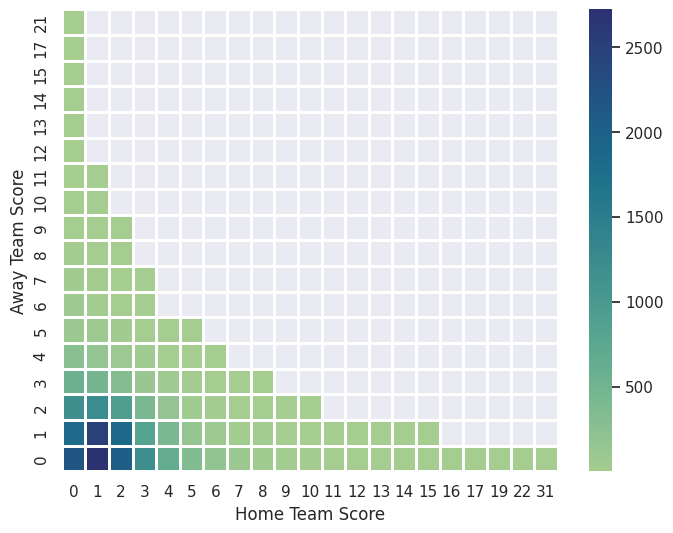

In [229]:
goals_df = matches_df[["home_team_score", "away_team_score"]].groupby(by=["home_team_score", "away_team_score"]).size().reset_index(name="matches").sort_values(by="matches")
goals_df = goals_df.rename(columns={
    "home_team_score": "Home Team Score",
    "away_team_score": "Away Team Score",
})
pivoted = goals_df.pivot("Away Team Score", "Home Team Score", "matches")
sns.set(rc={'figure.figsize':(8,6)})
hmap = sns.heatmap(pivoted, linewidth=2, cmap="crest")
hmap.invert_yaxis()

**Korelacija kvalitete veznog reda i broja golova**

<AxesSubplot: xlabel='Midfield mean score', ylabel='Goals'>

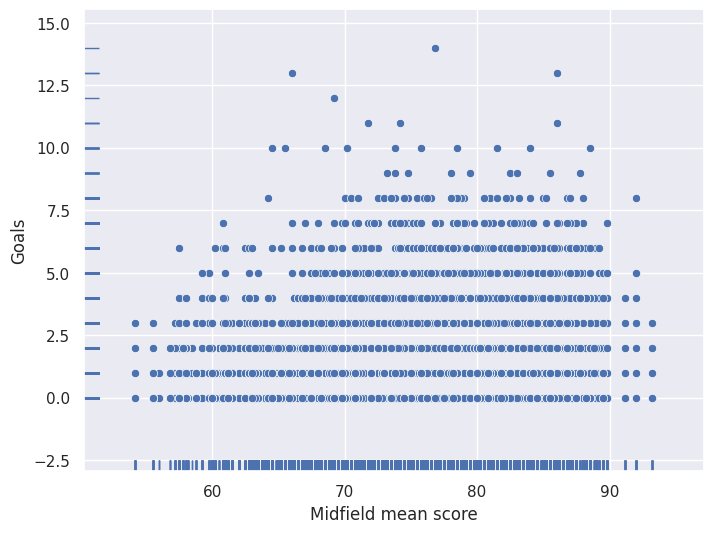

In [248]:
correl_ho = matches_df[["home_team_mean_midfield_score", "home_team_score"]].rename(columns={"home_team_mean_midfield_score": "score", "home_team_score": "goals"})
correl_aw = matches_df[["away_team_mean_midfield_score", "away_team_score"]].rename(columns={"away_team_mean_midfield_score": "score", "away_team_score": "goals"})
correl = pd.DataFrame(pd.concat([correl_ho, correl_aw])).dropna().rename(columns={"score": "Midfield mean score", "goals": "Goals"})
sns.scatterplot(data=correl, x="Midfield mean score", y="Goals")
sns.rugplot(data=correl, x="Midfield mean score", y="Goals")



**Korelacija kvalitete napada i broja golova**

<AxesSubplot: xlabel='Attack mean score', ylabel='Goals'>

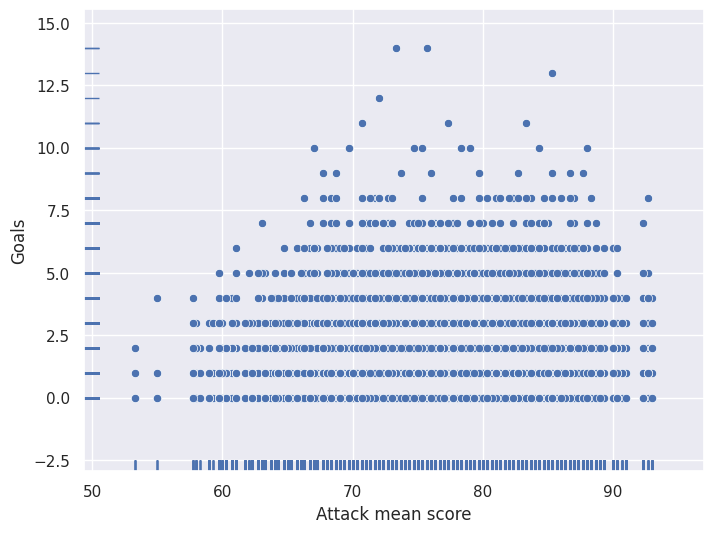

In [247]:
correl_ho = matches_df[["home_team_mean_offense_score", "home_team_score"]].rename(columns={"home_team_mean_offense_score": "score", "home_team_score": "goals"})
correl_aw = matches_df[["away_team_mean_offense_score", "away_team_score"]].rename(columns={"away_team_mean_offense_score": "score", "away_team_score": "goals"})
correl = pd.DataFrame(pd.concat([correl_ho, correl_aw])).dropna().rename(columns={"score": "Attack mean score", "goals": "Goals"})
sns.scatterplot(data=correl, x="Attack mean score", y="Goals")
sns.rugplot(data=correl, x="Attack mean score", y="Goals")


/tmp/ipykernel_9433/3640884453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_croatia_as_home_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_home_team["date"]).year
/tmp/ipykernel_9433/3640884453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_croatia_as_away_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_away_team["date"]).year
/tmp/ipykernel_9433/3640884453.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyw

<AxesSubplot: xlabel='year'>

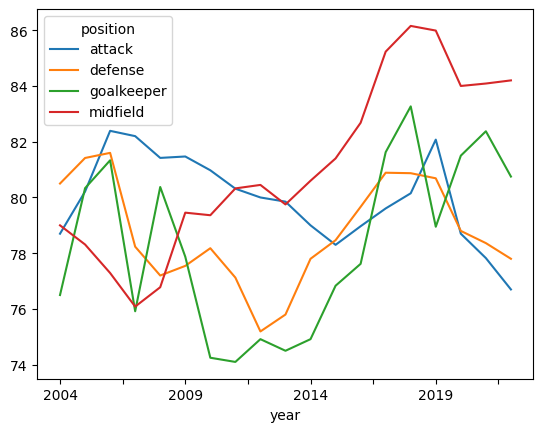

In [12]:
matches_with_croatia_as_home_team = matches_df.loc[matches_df["home_team"] == "Croatia"]
matches_with_croatia_as_away_team = matches_df.loc[matches_df["away_team"] == "Croatia"]

matches_with_croatia_as_home_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_home_team["date"]).year
matches_with_croatia_as_away_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_away_team["date"]).year

croatia_mean_rating_of_attack = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_offense_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_offense_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_defense = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_defense_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_defense_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_midfield = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_midfield_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_midfield_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_goalkeeper = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_goalkeeper_score"].mean().dropna(), matches_with_croatia_as_home_team.groupby('year')["away_team_goalkeeper_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values

years = np.tile(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 4)
score = np.concatenate((croatia_mean_rating_of_attack, croatia_mean_rating_of_defense, croatia_mean_rating_of_midfield, croatia_mean_rating_of_goalkeeper))
position = np.concatenate((np.tile('attack', int(len(years)/4)), np.tile('defense', int(len(years)/4)), np.tile('midfield', int(len(years)/4)), np.tile('goalkeeper', int(len(years)/4))))

croatia_overall_score_through_years_df = pd.DataFrame({'year': years, 'rate': np.array(score, dtype=float), 'position': position})
croatia_overall_score_through_years_df = croatia_overall_score_through_years_df.pivot("year", "position", "rate")
croatia_overall_score_through_years_df.plot()